In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing the modules

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')
import seaborn as sns

# Loading the data

In [58]:
diabetes = pd.read_csv(r'../input/pima-indians-diabetes-database/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [59]:
print(diabetes.describe(include='all'))
diabetes.isna().sum()

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Isn't it a relief when you don't find any missing values ?? xD

# First set of plots represent the outcome 0 and the next represents outcome as 1.

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

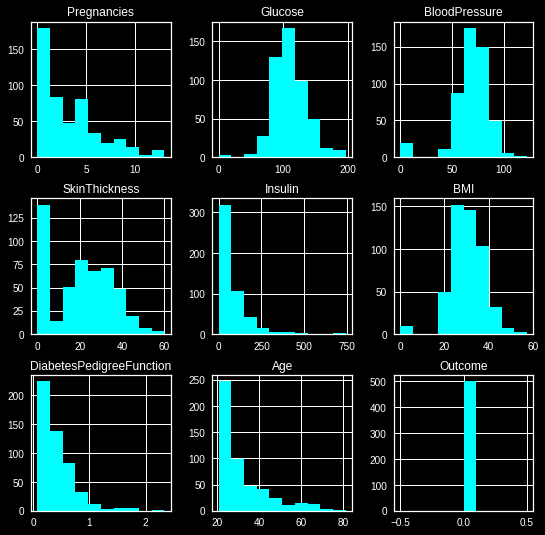

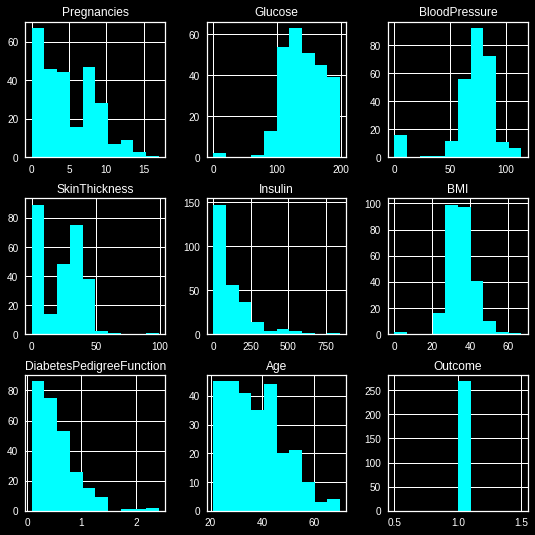

In [60]:

diabetes.groupby('Outcome').hist(figsize=(9, 9),color='cyan')

<AxesSubplot:title={'center':'Corelation'}>

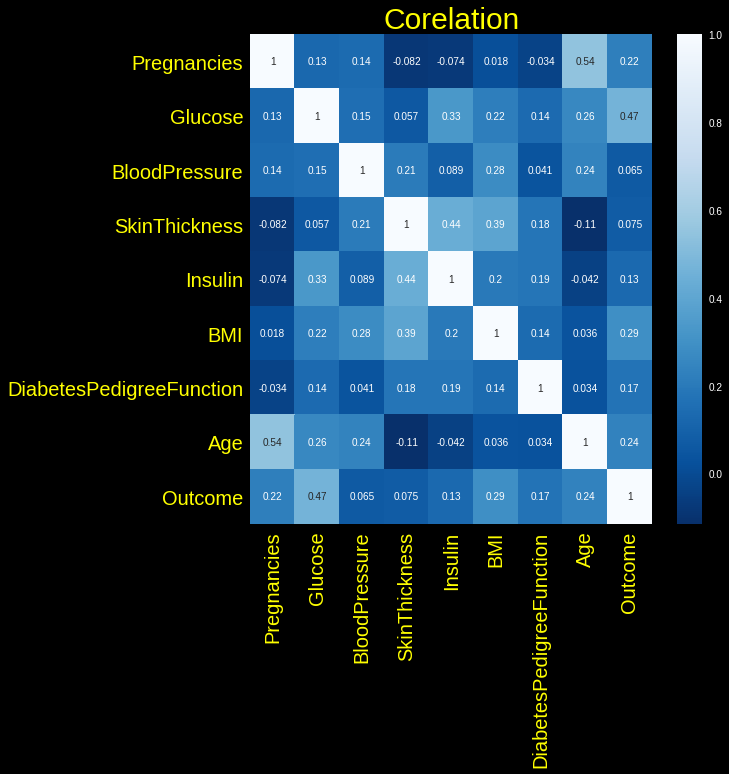

In [61]:
corr = diabetes.corr()
plt.figure(figsize=(9,9))
plt.title('Corelation',color='yellow',size=30)
plt.xticks(size=20,color='yellow')
plt.yticks(size=20,color='yellow')
sns.heatmap(corr,annot=True,cmap='Blues_r')

# Quick Introduction to PyCaret - An open source low-code ML library

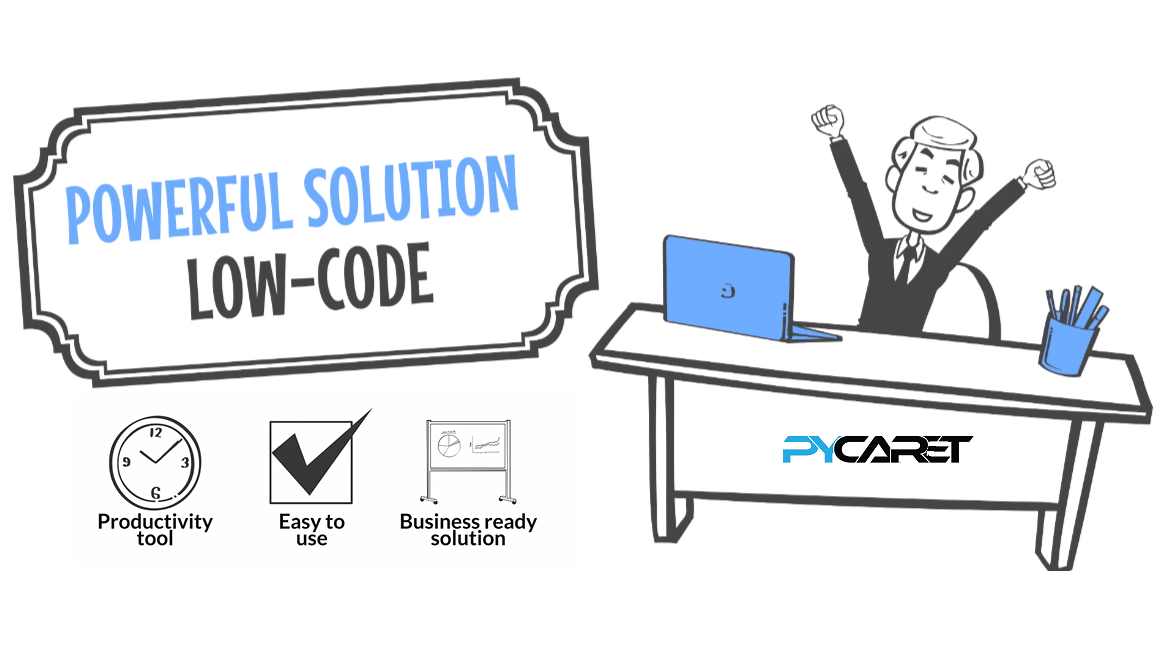


You can reach pycaret website and documentation from https://pycaret.org

PyCaret is an open source, low-code machine learning library in Python that allows you to go from preparing your data to deploying your model within seconds in your choice of notebook environment.

PyCaret being a low-code library makes you more productive. With less time spent coding, you and your team can now focus on business problems.

PyCaret is simple and easy to use machine learning library that will help you to perform end-to-end ML experiments with less lines of code.

PyCaret is a business ready solution. It allows you to do prototyping quickly and efficiently from your choice of notebook environment.



# Let's install PyCaret

In [ ]:
#pip install pycaret

# Import the entire Classification sub module

In [62]:
from pycaret.classification import *

# Setting up the Environment
Setup()-This function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must called before executing any other function in pycaret. It takes two mandatory parameters: dataframe {array-like, sparse matrix} and name of the target column. All other parameters are optional.

In [63]:
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']
clf = setup(data = diabetes, target = 'Outcome',train_size=0.8,numeric_imputation='mean',categorical_imputation='mode',feature_selection=True)

,Description,Value
0,session_id,6035
1,Target,Outcome
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(768, 9)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


# Parameters:

data: dataframe array-like, sparse matrix, shape (n_samples, n_features) where n_samples is the number of samples and n_features is the number of features.

target: string Name of the target column to be passed in as a string. The target variable could be binary or multiclass. In case of a multiclass target, all estimators are wrapped with a OneVsRest classifier.

train_size: float, default = 0.7 Size of the training set. By default, 70% of the data will be used for training and validation. The remaining data will be used for a test / hold-out set.

categorical_features: string, default = None If the inferred data types are not correct, categorical_features can be used to overwrite the inferred type. If when running setup the type of ‘column1’ is inferred as numeric instead of categorical, then this parameter can be used to overwrite the type by passing categorical_features = [‘column1’].

categorical_imputation: string, default = ‘constant’ If missing values are found in categorical features, they will be imputed with a constant ‘not_available’ value. The other available option is ‘mode’ which imputes the missing value using most frequent value in the training dataset.

numeric_imputation: string, default = ‘mean’ If missing values are found in numeric features, they will be imputed with the mean value of the feature. The other available option is ‘median’ which imputes the value using the median value in the training dataset.

feature_selection: bool, default = False When set to True, a subset of features are selected using a combination of various permutation importance techniques including Random Forest, Adaboost and Linear correlation with target variable. The size of the subset is dependent on the feature_selection_param. Generally, this is used to constrain the feature space in order to improve efficiency in modeling. When polynomial_features and feature_interaction are used, it is highly recommended to define the feature_selection_threshold param with a lower value.

# Now let's compare all our models

In [64]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7736,0.8171,0.5438,0.7049,0.6117,0.4566,0.4653,0.4860
rf,Random Forest Classifier,0.7720,0.8189,0.5493,0.7113,0.6144,0.4570,0.4685,0.3410
ridge,Ridge Classifier,0.7688,0.0000,0.5198,0.7059,0.5958,0.4402,0.4516,0.0160
lda,Linear Discriminant Analysis,0.7655,0.8130,0.5245,0.6940,0.5950,0.4354,0.4450,0.0170
catboost,CatBoost Classifier,0.7638,0.8255,0.5440,0.6850,0.6019,0.4382,0.4469,1.3000
ada,Ada Boost Classifier,0.7607,0.8009,0.5693,0.6592,0.6065,0.4375,0.4426,0.0700
gbc,Gradient Boosting Classifier,0.7589,0.8121,0.5731,0.6595,0.6098,0.4375,0.4419,0.0890
xgboost,Extreme Gradient Boosting,0.7475,0.7981,0.5683,0.6347,0.5956,0.4141,0.4179,12.7900
lightgbm,Light Gradient Boosting Machine,0.7459,0.8088,0.5786,0.6299,0.6009,0.4156,0.4180,0.0450
et,Extra Trees Classifier,0.7427,0.7838,0.4610,0.6696,0.5428,0.3725,0.3871,0.3150


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6035, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# As observed LogisticRegression is the best model so let's create one right away with the above parameters

In [65]:
logreg = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7903,0.8897,0.5714,0.7500,0.6486,0.5031,0.5125
1,0.7258,0.7944,0.5238,0.6111,0.5641,0.3658,0.3681
2,0.8065,0.8513,0.5714,0.8000,0.6667,0.5356,0.5506
3,0.7742,0.7480,0.5714,0.7059,0.6316,0.4714,0.4768
4,0.8197,0.8256,0.6000,0.8000,0.6857,0.5629,0.5743
5,0.8361,0.8732,0.7000,0.7778,0.7368,0.6183,0.6201
6,0.7213,0.7805,0.4000,0.6154,0.4848,0.3054,0.3187
7,0.7377,0.8768,0.4000,0.6667,0.5000,0.3370,0.3572
8,0.8033,0.8280,0.6500,0.7222,0.6842,0.5419,0.5435
9,0.7213,0.7037,0.4500,0.6000,0.5143,0.3244,0.3310


# Let's tune the model

In [66]:
tuned_model=tune_model(logreg)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7903,0.8873,0.5714,0.7500,0.6486,0.5031,0.5125
1,0.7258,0.7851,0.5238,0.6111,0.5641,0.3658,0.3681
2,0.8065,0.8537,0.5714,0.8000,0.6667,0.5356,0.5506
3,0.7742,0.7329,0.5714,0.7059,0.6316,0.4714,0.4768
4,0.8197,0.8171,0.6000,0.8000,0.6857,0.5629,0.5743
5,0.8525,0.8732,0.7000,0.8235,0.7568,0.6519,0.6563
6,0.7213,0.7817,0.4000,0.6154,0.4848,0.3054,0.3187
7,0.7541,0.8805,0.4500,0.6923,0.5455,0.3871,0.4040
8,0.7869,0.8305,0.6500,0.6842,0.6667,0.5102,0.5106
9,0.7213,0.7012,0.4500,0.6000,0.5143,0.3244,0.3310


# Ensemble Model
This function ensembles the trained base estimator using the method defined in ‘method’ param (default = ‘Bagging’). The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold (default = 10 Fold)

In [67]:
ensembled_lr = ensemble_model(tuned_model,method='Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8065,0.8595,0.6190,0.7647,0.6842,0.5469,0.5532
1,0.7419,0.7898,0.5714,0.6316,0.6000,0.4102,0.4113
2,0.8065,0.8560,0.5714,0.8000,0.6667,0.5356,0.5506
3,0.7742,0.7712,0.5714,0.7059,0.6316,0.4714,0.4768
4,0.8033,0.8524,0.5500,0.7857,0.6471,0.5165,0.5323
5,0.8033,0.8634,0.6500,0.7222,0.6842,0.5419,0.5435
6,0.7213,0.7829,0.4000,0.6154,0.4848,0.3054,0.3187
7,0.7377,0.8524,0.4000,0.6667,0.5000,0.3370,0.3572
8,0.8197,0.8293,0.6500,0.7647,0.7027,0.5745,0.5784
9,0.7049,0.7110,0.4000,0.5714,0.4706,0.2748,0.2832


# Learning Curve

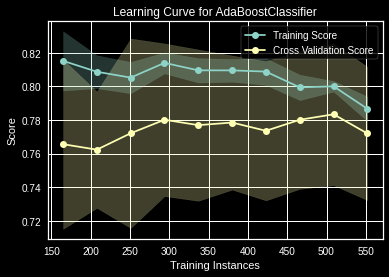

In [68]:
plot_model(ensembled_lr,plot='learning')

 # Evaluate the model
 
 **For intuitive understanding pycaret provides us with plots that we can choose to visualize. Click on the plot type to view the respective plot**

In [69]:
evaluate_model(ensembled_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# You can further use the predict_model() to get the predictions but since this is just a demo and hence ends here. The snippet for predictions is : predictions = predict_model(ensembled_model, data=your_test_data_goes_here).